## Création de sons .wav - ThinkDSP

Copyright 2015 Allen Downey


Here are the modules we'll need.

* `thinkdsp` is a module that accompanies _Think DSP_ and provides classes and functions for working with signals.

* `thinkplot` is a wrapper around matplotlib.

[Documentation of the thinkdsp module is here](http://greenteapress.com/thinkdsp.html). 

In [1]:
import thinkdsp
import thinkplot

import matplotlib.pyplot as plt
import numpy as np

from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
from IPython.display import display

import warnings
warnings.filterwarnings('ignore')


---
### Instantiate chirp signal

In [2]:
chirp_sig = thinkdsp.Chirp(start=2900, end=3100, amp=1.0)

### Waves

A Signal represents a mathematical function defined for all values of time.  If you evaluate a signal at a sequence of equally-spaced times, the result is a Wave.  `framerate` is the number of samples per second.

In [3]:
wave=chirp_sig.make_wave(duration=1., start=0., framerate=48000)
wave.normalize()  # normalisation (scales a wave so the range doesn't exceed -1 to 1)
wave.apodize()    # apodisation (tapers the beginning and end of the wave)

In [4]:
# 1sec de silence + chirp + 1sec de silence
fe = wave.framerate
wave.ys = np.hstack((np.zeros(int(fe*1.)), np.hstack((wave.ys, np.zeros(int(fe*1.))))))

IPython provides an Audio widget that can play a wave.

In [5]:
from IPython.display import Audio
audio = Audio(data = wave.ys, rate = wave.framerate)
audio

No handles with labels found to put in legend.


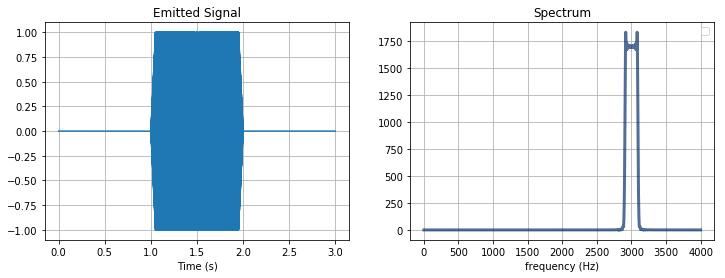

In [6]:
duration = len(wave.ys)/wave.framerate
t = np.arange(0.,duration, 1/wave.framerate)

plt.figure(figsize=(12,4))
plt.subplot(121)
plt.plot(t, wave.ys)
plt.title('Emitted Signal')
plt.grid()
plt.xlabel('Time (s)')


plt.subplot(122)
spectrum = wave.make_spectrum()
spectrum.plot(high=4000)
thinkplot.config(xlabel='frequency (Hz)')
plt.grid()
plt.title('Spectrum')
plt.show()

###  Write a wave to a WAV file

In [7]:
wave.write('input_signal.wav')

Writing input_signal.wav
